<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [8]:
sac_csv = './data/sacramento_real_estate_transactions.csv'

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

%matplotlib inline

sac_df = pd.read_csv(sac_csv, sep=',')

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [70]:
sac_df.shape
sac_df.info()
sac_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [71]:
sac_df.rename(columns = {'sq__ft':'sqft'}, inplace = True)

In [72]:
sac_df.sort_values(by='sqft')

,street,city,zip,state,beds,baths,sqft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433
492,2513 OLD KENMARE RD,LINCOLN,95648,CA,5,3,0,Residential,Mon May 19 00:00:00 EDT 2008,304000,38.847396,-121.259586
559,40 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.884535,-121.289619
558,36 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.884599,-121.289406
557,32 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.884741,-121.289390
...,...,...,...,...,...,...,...,...,...,...,...,...
317,9760 LAZULITE CT,ELK GROVE,95624,CA,4,3,3992,Residential,Tue May 20 00:00:00 EDT 2008,460000,38.403609,-121.335541
535,3027 PALMATE WAY,SACRAMENTO,95834,CA,5,3,4246,Residential,Mon May 19 00:00:00 EDT 2008,452000,38.628955,-121.529269
534,5201 BLOSSOM RANCH DR,ELK GROVE,95757,CA,4,4,4303,Residential,Mon May 19 00:00:00 EDT 2008,450000,38.399436,-121.444041
864,9401 BARREL RACER CT,WILTON,95693,CA,4,3,4400,Residential,Fri May 16 00:00:00 EDT 2008,884790,38.415298,-121.194858


In [73]:
sac_df.sort_values(by='sqft')

sac_df.iloc[703, sac_df.columns.get_loc('state')] = 'CA'
sac_df.iloc[703, sac_df.columns.get_loc('sqft')] = 984
sac_df.iloc[703, sac_df.columns.get_loc('price')] = 210944
sac_df.iloc[703, sac_df.columns.get_loc('latitude')] = 38.668433
sac_df.iloc[703, sac_df.columns.get_loc('longitude')] = -121.503471

sac_df.iloc[703]

street                   1900 DANBROOK DR
city                           SACRAMENTO
zip                                 95835
state                                  CA
beds                                    1
baths                                   1
sqft                                  984
type                                Condo
sale_date    Fri May 16 00:00:00 EDT 2008
price                              210944
latitude                          38.6684
longitude                        -121.503
Name: 703, dtype: object

In [74]:
sac_df.describe()

,zip,beds,baths,sqft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [75]:
sac_df.iloc[865, sac_df.columns.get_loc('sqft')] = 5100
sac_df.iloc[865, sac_df.columns.get_loc('price')] = 1551000

In [76]:
sac_df[sac_df.price == sac_df.price.min()]

,street,city,zip,state,beds,baths,sqft,type,sale_date,price,latitude,longitude
866,14151 INDIO DR,SLOUGHHOUSE,95683,CA,3,4,5822,Residential,Fri May 16 00:00:00 EDT 2008,2000,38.490447,-121.129337


In [77]:
sac_df.describe()

,zip,beds,baths,sqft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,9.850000e+02,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1320.094416,2.357173e+05,38.607732,-121.355982
std,85.176072,1.307932,0.895371,860.504016,1.443951e+05,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,2.000000e+03,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,956.000000,1.450000e+05,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,2.150000e+05,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1720.000000,3.000000e+05,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,1.551000e+06,39.020808,-120.597599


In [78]:
sac_df.price = sac_df.price.round(0)

In [79]:
sac_df.describe()

new_df = sac_df[sac_df.sqft>=1]

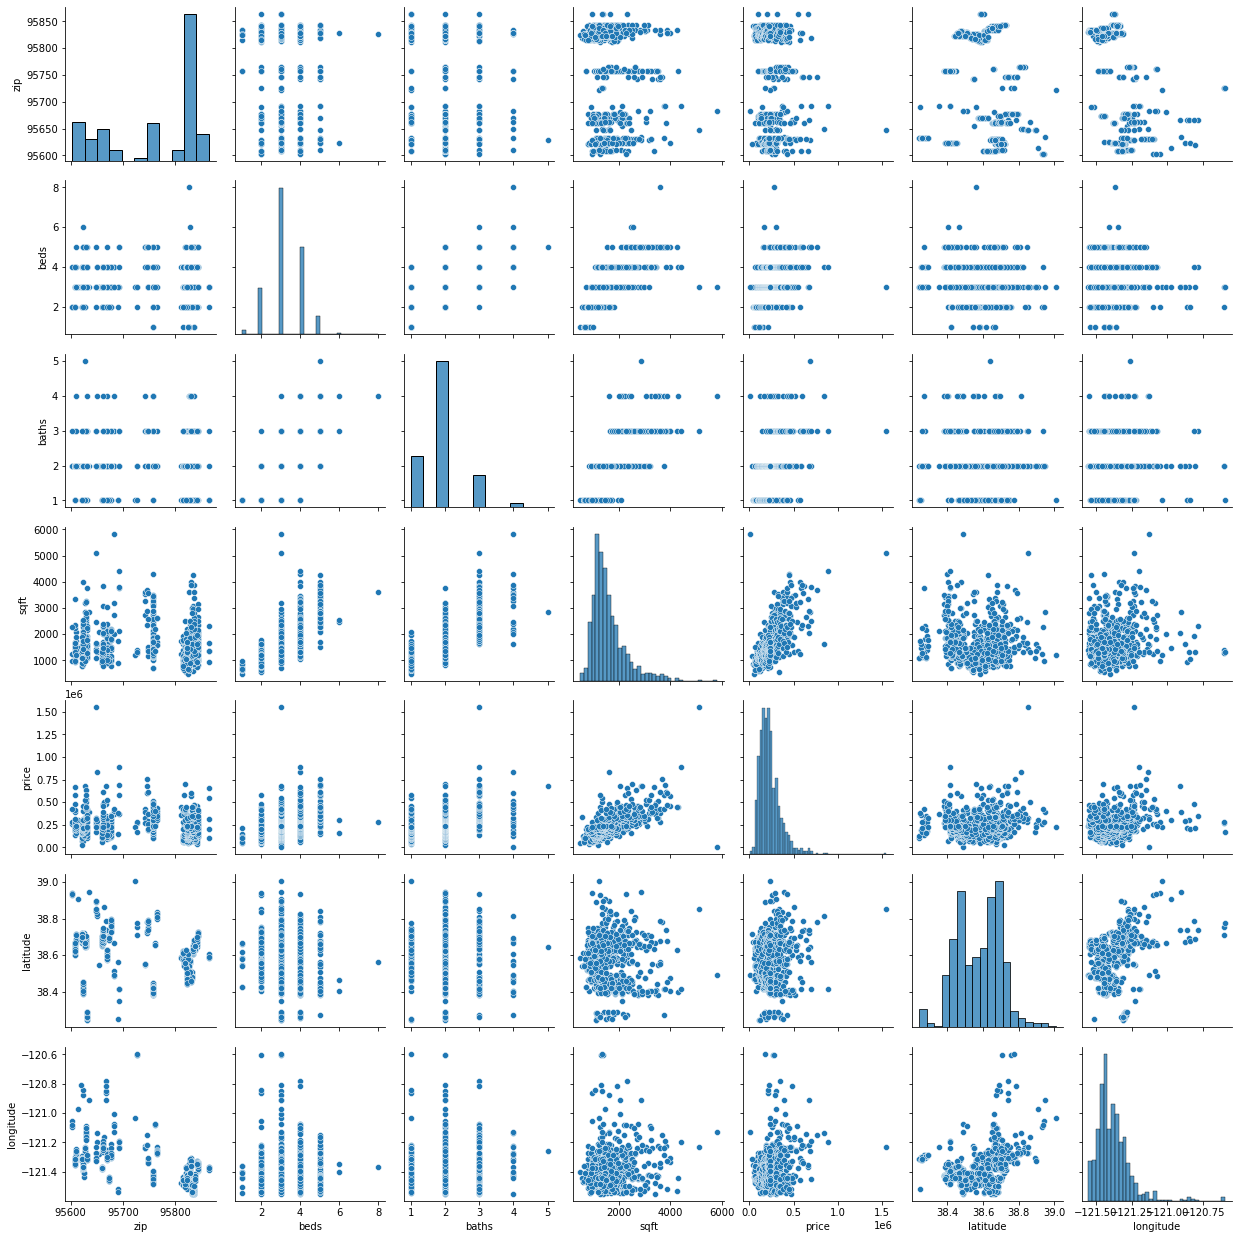

In [81]:
sns.pairplot(new_df)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

In [80]:
Beds, baths, square foot

,zip,beds,baths,sqft,price,latitude,longitude
count,815.000000,815.000000,815.000000,815.000000,8.150000e+02,815.000000,815.000000
mean,95761.352147,3.244172,1.961963,1595.451534,2.310699e+05,38.577381,-121.378507
std,85.384158,0.851657,0.670382,674.723307,1.283880e+05,0.126603,0.119774
min,95603.000000,1.000000,1.000000,484.000000,2.000000e+03,38.241514,-121.550527
25%,95670.000000,3.000000,2.000000,1144.000000,1.487500e+05,38.473956,-121.451482
50%,95820.000000,3.000000,2.000000,1419.000000,2.080000e+05,38.591822,-121.404999
75%,95828.000000,4.000000,2.000000,1853.500000,2.850000e+05,38.675185,-121.325724
max,95864.000000,8.000000,5.000000,5822.000000,1.551000e+06,39.008159,-120.597599


### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [5]:
# A:square feet - it appears to have the strongest correlation with price.

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [6]:
# A:



### 6. Interpret the intercept. Interpret the slope.

In [7]:
# A:

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [8]:
# A:

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [9]:
# A: